In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [19]:
data_2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


In [21]:
# yaş aralıklarını kategorize ediyoruz 0-80 arası
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)

In [22]:
data_2.age.unique()

['Young', 'Adult', NaN, 'Old', 'Infant', 'Kid']
Categories (5, object): ['Infant' < 'Kid' < 'Young' < 'Adult' < 'Old']

In [25]:
pd.DataFrame(data_2['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


<AxesSubplot:>

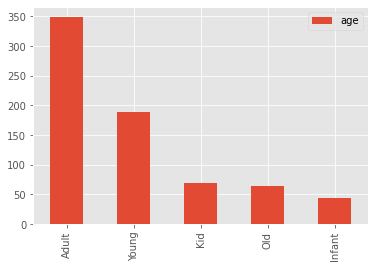

In [38]:
pd.DataFrame(data_2['age'].value_counts()).plot(kind='bar')

In [26]:
data_3 = data_2.fillna({'age' : data_2['age'].mode()[0]})

In [27]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [29]:
data_3 = data_2.fillna({'embarked' : 'S'})

In [31]:
data_3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,7.2500,S,Third
1,1,1,female,Adult,1,0,71.2833,C,First
2,1,3,female,Adult,0,0,7.9250,S,Third
3,1,1,female,Adult,1,0,53.1000,S,First
4,0,3,male,Adult,0,0,8.0500,S,Third


In [32]:
data_3[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')

,survived
pclass,
2,87
3,119
1,136


<AxesSubplot:xlabel='sex'>

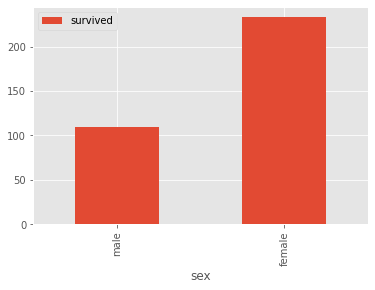

In [37]:
data_3[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived').plot(kind='bar')

In [39]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_3['fare'] = pd.cut(data_3["fare"], bins = bins, labels = labels)

C:\Users\malio\anaconda3\envs\pytorch_cuda11\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='survived', ylabel='Density'>

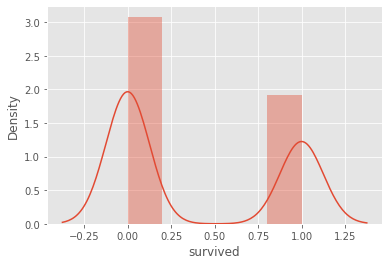

In [40]:
data_4 = data_3.drop('class', axis=1)
sns.distplot(data_4['survived'])

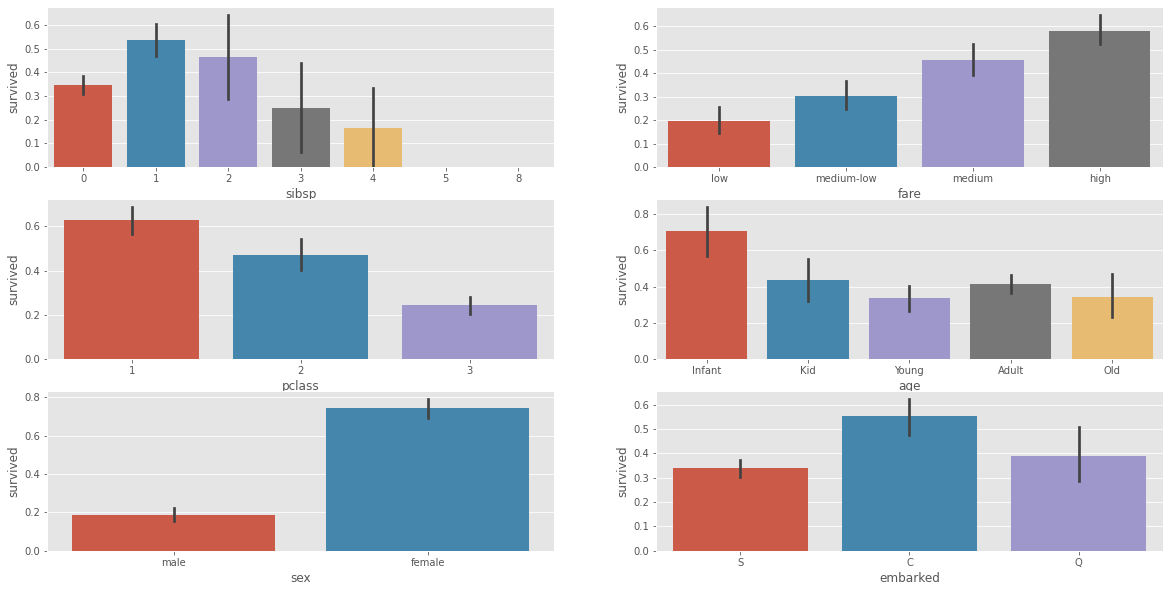

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data_4)
plt.subplot(322)
sns.barplot(x = 'fare', y = 'survived', data = data_4)
plt.subplot(323)
sns.barplot(x = 'pclass', y = 'survived', data = data_4)
plt.subplot(324)
sns.barplot(x = 'age', y = 'survived', data = data_4)
plt.subplot(325)
sns.barplot(x = 'sex', y = 'survived', data = data_4)
plt.subplot(326)
sns.barplot(x = 'embarked', y = 'survived', data = data_4);

In [46]:
data_4

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,Young,1,0,low,S
1,1,1,female,Adult,1,0,high,C
2,1,3,female,Adult,0,0,medium-low,S
3,1,1,female,Adult,1,0,high,S
4,0,3,male,Adult,0,0,medium-low,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S
887,1,1,female,Young,0,0,medium,S
888,0,3,female,NaN,1,2,medium,S
889,1,1,male,Adult,0,0,medium,C


Now, machine learning models hates non-numeric values. We cannot put them to our train and test data. We need to convert them into numeric values. You have two options for that; Label Encoder, and Pandas get_dummies method. we use get_dummies.

In [42]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_4[dummies])

Let’s open it up a little. ‘dummies’ contains column names that we want to convert into numeric values. Every variable in them will become a column, and their absence will define as 0, and 1 whether they’re true for that passenger or not.

In [45]:
dummy_data

,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,0,1,0,0,0,0,0,0,0,0,1,1,0
889,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [43]:
data_5 = pd.concat([data_4, dummy_data], axis = 1)
data_5.drop(dummies, axis=1, inplace=True)

In [44]:
data_5

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0
889,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [49]:
# We will concat the two data frames, and drop the old columns.

data_5 = pd.concat([data_4, dummy_data], axis = 1)
data_5.drop(dummies, axis=1, inplace=True)

In [48]:
data_5

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0
889,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
X = data_5.drop('survived', axis = 1)
y = data_5['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [53]:
accuracy_score(y_pred, y_test)

0.8067796610169492

In [56]:
confusion_matrix(y_pred, y_test)

array([[158,  31],
       [ 26,  80]], dtype=int64)